In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
csv_df = pd.read_csv('C:/ME Lethal Prediction/ME_FNL1.csv')
csv_df.head()

,Decade,Year,Month,Week,Day,Extended,Country,Success,Multiple,Suicide,...,ArmedAssault,Infrastructure,Assassination,UnknownAttack,Explosives,UnknownWeapon,Firearms,Incendiary,Melee,OtherWeapon
0,1970,1970,3,2,14,0,Egypt,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1970,1970,3,4,29,0,Lebanon,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1970,1970,4,3,15,0,OtherCountry,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1970,1970,4,4,25,0,Turkey,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1970,1970,6,1,7,1,OtherCountry,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Decade                  35766 non-null  int64 
 1   Year                    35766 non-null  int64 
 2   Month                   35766 non-null  int64 
 3   Week                    35766 non-null  int64 
 4   Day                     35766 non-null  int64 
 5   Extended                35766 non-null  int64 
 6   Country                 35766 non-null  object
 7   Success                 35766 non-null  int64 
 8   Multiple                35766 non-null  int64 
 9   Suicide                 35766 non-null  int64 
 10  Attack                  35766 non-null  object
 11  Weapon                  35766 non-null  object
 12  Province                35766 non-null  object
 13  City                    35766 non-null  object
 14  Group                   35766 non-null  object
 15  Ta

# Encoding with integers in an ordered manner

In [17]:
from feature_engine.encoding import OneHotEncoder 
# the following is not used anymore from feature_engine import categorical_encoders as ce 

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
# define x and y
feature_cols = ['Attack', 'Lethal']
X = csv_df[feature_cols]
Y = csv_df.Lethal
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# split X and Y into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, shuffle = True, random_state = 66)

In [20]:
X_train

,Attack,Lethal
26472,UnknownAttack,1
7334,Bomb,0
24905,Bomb,0
17007,ArmedAssault,1
2361,Infrastructure,0
...,...,...
25525,Bomb,1
31950,Bomb,0
4527,Bomb,0
1622,Bomb,0


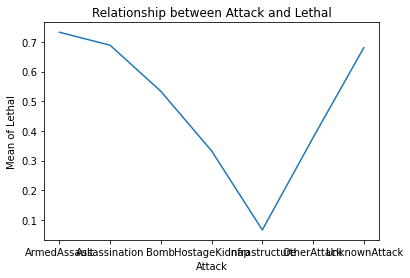

In [21]:
# Let's plot the mean Lethal target response per category of the Attack variable:
X_train.groupby(['Attack'])['Lethal'].mean().plot()
plt.title('Relationship between Attack and Lethal')
plt.ylabel('Mean of Lethal')
plt.show()
# We can see the non-monotonic relationship between categories of Attack and the target, Lethal, in the following screenshot:

Now, let's calculate the mean target value per category in A7, then let's sort the categories from that with the lowest to that with the highest target value, and finally, let's retain the ordered category names:

In [22]:
ordered_labels = X_train.groupby(['Attack'])['Lethal'].mean().sort_values().index

In [23]:
# Let's create a dictionary of category to integer pairs, using the ordered list we created in the previous step:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

In [24]:
# We can visualize the result of the preceding code executing
print(ordinal_mapping)

{'Infrastructure': 0, 'HostageKidnap': 1, 'OtherAttack': 2, 'Bomb': 3, 'UnknownAttack': 4, 'Assassination': 5, 'ArmedAssault': 6}


In [25]:
# Let's use the dictionary created in a previous step to replace the categories in Attack in the train and test sets:
X_train['Attack'] = X_train['Attack'].map(ordinal_mapping)
X_test['Attack'] = X_test['Attack'].map(ordinal_mapping)

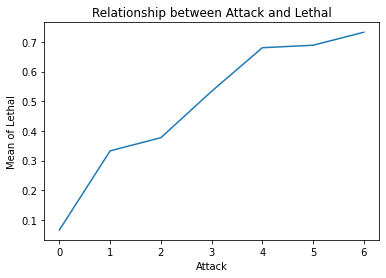

In [26]:
# Let's plot the mean target value per category in the encoded variable:
X_train.groupby(['Attack'])['Lethal'].mean().plot()
plt.title('Relationship between Attack and Lethal')
plt.ylabel('Mean of Lethal')
plt.show()

Now, let's perform ordered ordinal encoding using Feature-engine.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X.drop(labels = ['Lethal'], axis = 1), 
                                                    X['Lethal'], 
                                                    test_size = 0.3, 
                                                    random_state = 0)

Note that to encode with integers based on the target with Feature-engine, we don't need to keep the target in the X_train and X_test datasets. Next, let's create an encoder that assigns digits to categories according to the target mean value, and encodes all categorical variables in the dataset:

In [28]:
from feature_engine.encoding import OrdinalEncoder
ordinal_enc = OrdinalEncoder(encoding_method = 'ordered', variables = None)

Let's fit the encoder to the train set so that it finds the categorical variables, and then it creates and stores the category and digit pairs for each categorical feature:

In [29]:
ordinal_enc.fit(X_train, Y_train)

OrdinalEncoder()

In [30]:
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
reg = linear_model.Ridge(alpha = .5)

In [32]:
reg.fit(X_train_enc, Y_train)

Ridge(alpha=0.5)

In [33]:
print(reg.score(X_test_enc, Y_test))

0.05264922901144409


In [34]:
y_pred = reg.predict(X_test_enc)
mae = mean_absolute_error(Y_test, y_pred)
mae

0.4677428083253124

In [35]:
# Evaluating Model Performance

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.4677428083253124
Mean Squared Error: 0.23366451376289735
Root Mean Squared Error: 0.48338857429908016


In [36]:
result_df = pd.DataFrame(data = {'Lethal': y_pred})
result_df

,Lethal
0,0.521170
1,0.521170
2,0.764322
3,0.521170
4,0.683272
...,...
10725,0.683272
10726,0.521170
10727,0.764322
10728,0.521170


# Encoding with the mean of the target

Mean encoding or target encoding implies replacing the categories with the average target
value for that category. For example, if we have a City variable, with the categories
of London, Manchester, and Bristol, and we want to predict the default rate; if the default
rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is
20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous
target.

In [37]:
# define x and y
feature_cols = ['Attack', 'Lethal']
X = csv_df[feature_cols]
Y = csv_df.Lethal
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# split X and Y into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, shuffle = True, random_state = 66)

Let's determine the mean target value per category of the Attack variable and then store them in a dictionary:

In [38]:
ordered_labels = X_train.groupby(['Attack'])['Lethal'].mean().to_dict()

We can display the content of the dictionary by executing

In [39]:
print(ordered_labels)

{'ArmedAssault': 0.7324117501851395, 'Assassination': 0.6886496186630776, 'Bomb': 0.5334262614998606, 'HostageKidnap': 0.33281972265023113, 'Infrastructure': 0.06654676258992806, 'OtherAttack': 0.3772455089820359, 'UnknownAttack': 0.6802721088435374}


In [40]:
# Let's replace the categories with the mean target value using the dictionary created in step 3 in the train and test sets:
X_train['Attack'] = X_train['Attack'].map(ordered_labels)
X_test['Attack'] = X_test['Attack'].map(ordered_labels)

Go ahead and inspect the new values of A7 by executing

In [41]:
X_train['Attack'].head()

26472    0.680272
7334     0.533426
24905    0.533426
17007    0.732412
2361     0.066547
Name: Attack, dtype: float64

Now, let's perform target encoding with Feature-engine. First, let's load and divide the dataset into train and test sets:

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X.drop(labels = ['Lethal'], axis = 1), X['Lethal'], test_size = 0.3, random_state = 0)

Let's now create a target mean encoder to encode all categorical variables:

In [43]:
from feature_engine.encoding import MeanEncoder
mean_enc = MeanEncoder(variables = None)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, X['Lethal'], test_size = 0.3, random_state = 0)

Note that, to encode with integers based on the target with pandas, we need to keep the target in the X_train and X_test datasets. Let's determine the mean target value per category of the A7 variable and then store them in a dictionary:

In [45]:
ordered_labels = X_train.groupby(['Attack'])['Lethal'].mean().to_dict()

We can display the content of the dictionary by executing:

In [46]:
print(ordered_labels)

{'ArmedAssault': 0.726332537788385, 'Assassination': 0.6938095238095238, 'Bomb': 0.5340351716712526, 'HostageKidnap': 0.34929810074318746, 'Infrastructure': 0.07156673114119923, 'OtherAttack': 0.3860759493670886, 'UnknownAttack': 0.661319073083779}


Let's replace the categories with the mean target value using the dictionary created in step 3 in the train and test sets:

In [47]:
X_train['Attack'] = X_train['Attack'].map(ordered_labels)
X_test['Attack'] = X_test['Attack'].map(ordered_labels)

Go ahead and inspect the new values of A7 by executing

In [48]:
X_train['Attack'].head()

29412    0.534035
24072    0.534035
32053    0.534035
10330    0.534035
13313    0.534035
Name: Attack, dtype: float64

Now, let's perform target encoding with Feature-engine. First, let's load and divide the dataset into train and test sets:

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X.drop(labels = ['Lethal'], axis = 1), X['Lethal'],
 test_size = 0.3, random_state = 0)

Note that, to encode with integers based on the target with Featureengine, we don't need to keep the target in the X_train and X_test
datasets. Let's now create a target mean encoder to encode all categorical variables:

In [50]:
mean_enc = MeanEncoder(variables = None)

MeanEncoder() will find and encode all categorical variables by default. Alternatively, we can indicate the variables to encode
passing their names in a list to the variables argument.Let's fit the transformer to the train set so that it learns and stores the mean target value per category per variable:

In [51]:
mean_enc.fit(X_train, Y_train)

MeanEncoder()

In [52]:
# Finally, let's encode the train and test sets:
X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)
# The category-to-number pairs are stored as a dictionary of dictionaries in the encoder_dict_ attribute. 
# To display the stored parameters,execute 
mean_enc.encoder_dict_

{'Attack': {'ArmedAssault': 0.726332537788385,
  'Assassination': 0.6938095238095238,
  'Bomb': 0.5340351716712526,
  'HostageKidnap': 0.34929810074318746,
  'Infrastructure': 0.07156673114119923,
  'OtherAttack': 0.3860759493670886,
  'UnknownAttack': 0.661319073083779}}

# Encoding with the Weight of Evidence

In [53]:
from feature_engine.encoding import WoEEncoder

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, shuffle = True, random_state = 66)

Let's create a pandas Series with the probability of the target being 1, that is, p(1), for each category in Attack:

In [55]:
p1 = X_train.groupby(['Attack'])['Lethal'].mean()

Let's create a pandas Series with the probability of the target being 0, that is, p(0), for each category in Attack:

In [56]:
p0 = 1 - p1

By definition, the probability of the target being 1 plus the probability of the target being 0 is 1. Now, let's create a dictionary with the WoE per category:

In [57]:
woe = dict(np.log(p1 / p0))

We can display the dictionary with the category to WoE pairs executing

In [58]:
print(woe)

{'ArmedAssault': 1.0068934382912302, 'Assassination': 0.793813699514493, 'Bomb': 0.13390476937346313, 'HostageKidnap': -0.6954593203183247, 'Infrastructure': -2.640985970521664, 'OtherAttack': -0.50125617274984, 'UnknownAttack': 0.7550225842780328}


Finally, let's replace the categories of A1 by the WoE:

In [59]:
X_train['Attack'] = X_train['Attack'].map(woe)
X_test['Attack'] = X_test['Attack'].map(woe)

Now, let's perform WoE encoding using Feature-engine. First, let's load and divide the dataset into train and test sets:

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X.drop(labels = ['Lethal'], axis = 1), X['Lethal'], test_size = 0.3, random_state = 0)

Next, let's create a WoE encoder to encode the categorical variable Attack

In [61]:
woe_enc = WoEEncoder(variables = ['Attack'])

Let's fit the transformer to the train set so that it learns and stores the WoE of the different categories:

In [62]:
woe_enc.fit(X_train, Y_train)

WoEEncoder(variables=['Attack'])

Finally, let's encode the three categorical variables in the train and test sets:

In [63]:
X_train_enc = woe_enc.transform(X_train)
X_test_enc = woe_enc.transform(X_test)

# Transforming a Numerical Variable

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from feature_engine import transformation as vt

In [65]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns = boston_dataset.feature_names)
import csv
data.to_csv('Boston.csv') 

C:\Users\Nicholas\anaconda3\envs\Fatalities_Prediction\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


To evaluate the effect of the transformation on the variable distribution, we'll
create a function that takes a dataframe and a variable name as inputs and plots a
histogram next to a Q-Q plot:

In [67]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Now, let's plot the distribution of the LSTAT variable. The following output shows that LSTAT is not normally distributed:

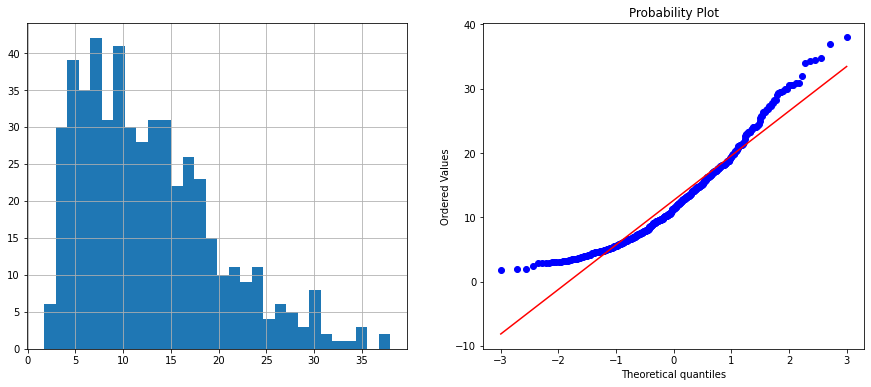

In [68]:
diagnostic_plots(data, 'LSTAT')

Now, let's transform the data with the logarithm. First, let's make a copy of the original dataframe using pandas copy():

In [69]:
Boston_tf = Boston.copy()

We've created a copy so that we can modify the values in the copy and not in the 
original dataframe, which we need for the rest of the code.
If we execute Boston_tf = Boston instead of using pandas copy(),
Boston_tf will not be a copy of the dataframe; instead, it will be another
view of the same data. Therefore, changes that are made in Boston_tf will
be reflected in data as well.

Let's apply the logarithmic transformation with NumPy to a subset of positive
variables to capture the transformed variables in the new dataframe:

In [70]:
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(Boston[['LSTAT',
'NOX', 'DIS', 'RM']])

Let's check the distribution of LSTAT after the transformation with the diagnostic
function we created earlier. We can see the effect of the transformation in the following output:

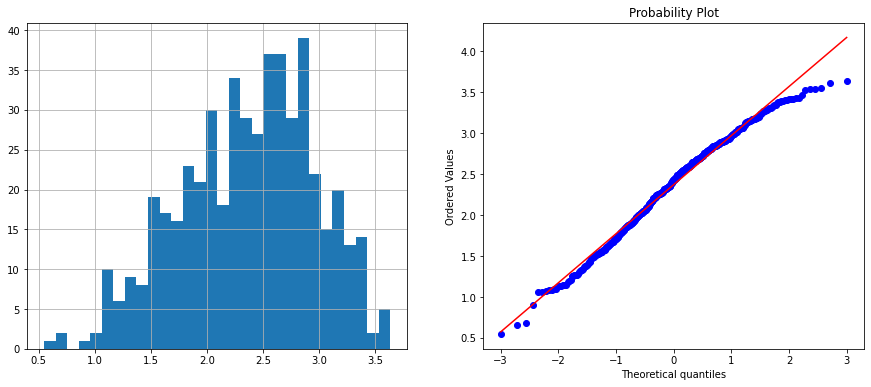

In [71]:
diagnostic_plots(Boston_tf, 'LSTAT')

Now, let's apply the logarithmic transformation with scikit-learn.

In [72]:
transformer = FunctionTransformer(np.log)

FunctionTransformer() doesn't need to be fit before transforming the
data since there are no parameters to be learned from the train set.

Let's transform a subset of positive variables:

In [73]:
Boston_tf = transformer.transform(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

Note that Boston_tf is a NumPy array with only the transformed variables.

We can transform the NumPy array into a pandas dataframe by executing
Boston_tf = pd.DataFrame(Boston_tf, columns = ['LSTAT',
'NOX', 'DIS', 'RM']) and then check that the transformation was
successful with the diagnostic function created earlier. Now, let's do logarithm transformation with Feature-engine. Let's create a transformer using LogTransformer() and fit it to the dataset: 

In [74]:
lt = vt.LogTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])
lt.fit(Boston)

LogTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

If the variables argument is left as None, LogTransformer() identifies
and applies the logarithm to all the numerical variables in the dataset.
Alternatively, we can indicate which variables we want to transform, just
like we did in a previous step.

Finally, let's transform the data:

In [75]:
Boston_tf = lt.transform(Boston)

The transformer will only transform the variables indicated previously. Note that Boston_tf is
a pandas dataframe that contains all of the original variables, where only the LSTAT, NOX,
DIS, and RM variables were transformed by the logarithm.

# Transforming variables with the reciprocal function

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from feature_engine import transformation as vt

To evaluate the effect of the transformation on the variable distribution, we'll
create a function that takes a dataframe and a variable name as inputs and plots a
histogram next to a Q-Q plot:

In [77]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins = 30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.show()

Now, let's plot the distribution of the DIS variable. DIS is not normally distributed, as shown in the following output:

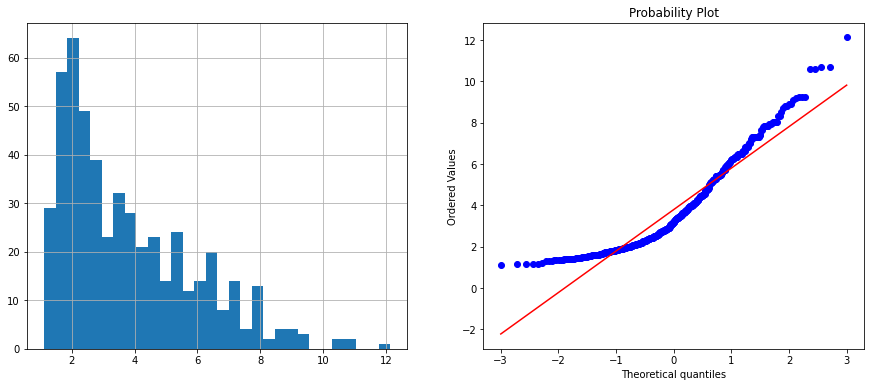

In [78]:
diagnostic_plots(data, 'DIS')

Now, let's apply the reciprocal transformation with NumPy.  First, let's make a copy of the original dataframe using pandas copy() so that we
can modify the values in the copy and not in the original dataframe, which we 
need for the rest of this recipe:


In [79]:
Boston_tf = Boston.copy()

Remember that executing Boston_tf = data, instead of using pandas
copy(), creates an additional view of the same data. Therefore, changes
that are made in Boston_tf will be reflected in the data as well.

Using NumPy, we'll apply the reciprocal transformation to a group of variables:

In [91]:
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.reciprocal(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

Let's check the distribution of the DIS variable after the transformation with the
diagnostic function we created earlier. The transformed DIS distribution can be seen in the plots that are returned by the
following code block:

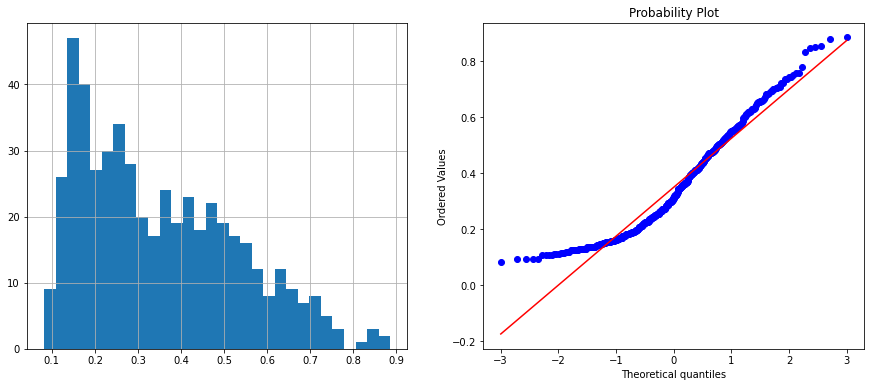

In [92]:
diagnostic_plots(Boston_tf, 'DIS')

Now, let's apply reciprocal transformation with scikit-learn. Let's create a transformer using FunctionTransformer() by passing
np.reciprocal as an argument:

In [82]:
transformer = FunctionTransformer(np.reciprocal)

FunctionTransformer() doesn't need to be fit before transforming the data since there are no parameters to be learned from the train set. Now, let's transform a group of variables from the dataset:

In [83]:
Boston_tf = transformer.transform(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

Note that Boston_tf is a NumPy array with only the transformed variables. If we want to retain the original variables in the final output, we can
create a copy of the original dataframe, like we did in an earlier step, and then
execute Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] =
transformer.transform(Boston[['LSTAT', 'NOX', 'DIS',
'RM']]). Now, let's apply the reciprocal transformation with Feature-engine.
Here, we'll call ReciprocalTransformer(), indicate the variables to transform,
and then fit it to the dataset:

In [84]:
rt = vt.ReciprocalTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])
rt.fit(Boston)

ReciprocalTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

If the variables argument is None, the transformer identifies and applies
the reciprocal function to all the numerical variables in the dataset. If
some of the variables contain the value zero, this will return an error. Let's transform the selected variables in our dataset:

In [85]:
Boston_tf = rt.transform(Boston)

ReciprocalTransformer() will return a pandas dataframe with the original variables,
where the variables indicated are transformed with the reciprocal function.

# Using square and cube root to transform variables

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer

In [104]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [87]:
# First, let's make a copy of the original dataframe using pandas copy():
Boston_tf = Boston.copy()

Let's apply the square root transformation with NumPy to a group of variables and capture it in the new dataframe:

In [88]:
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.sqrt(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

If we want to apply the cube root transformation instead, we can do so with NumPy's cbrt(), like so :

In [124]:
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.cbrt(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

To evaluate the effect of the transformation on the variable distribution, we'll
create a function that takes a dataframe and a variable name as inputs and plots a
histogram next to a Q-Q plot:

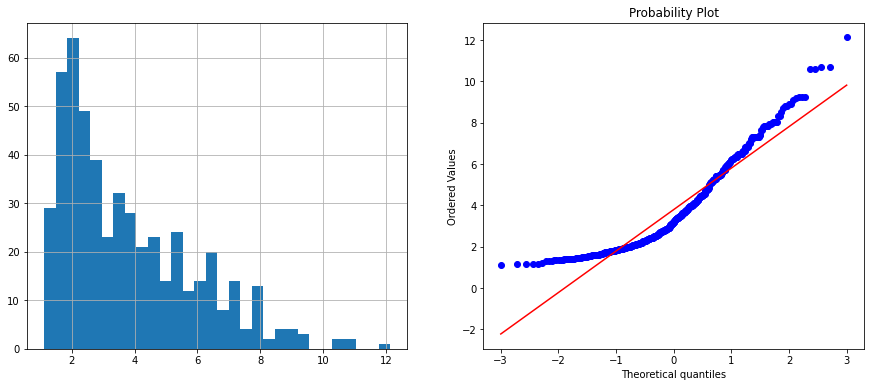

In [125]:
diagnostic_plots(Boston, 'DIS')

In [126]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins = 30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.show()

Let's check the distribution of the DIS variable after the transformation with the diagnostic function we created earlier. The transformed DIS distribution can be seen in the plots that are returned by the following code block:

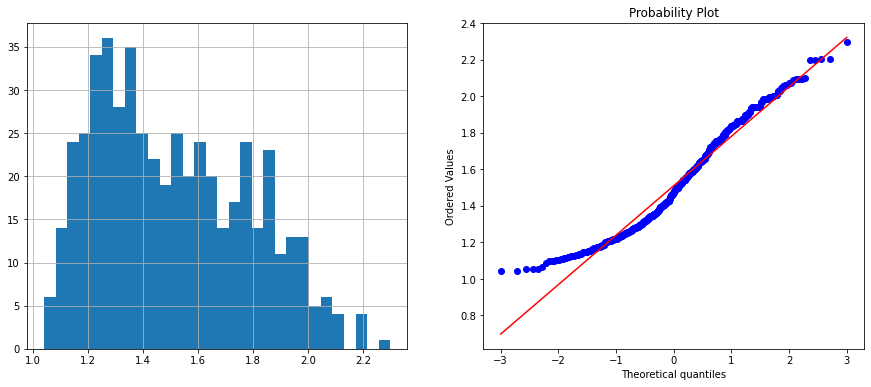

In [127]:
diagnostic_plots(Boston_tf, 'DIS')

Now, let's apply the square root transformation with scikit-learn. Let's create a transformer by passing NumPy's sqrt() as an argument:

In [96]:
transformer = FunctionTransformer(np.sqrt)

If we want to perform the cube root transformation, we need to set up the
transformer using transformer = FunctionTransformer(np.cbrt).

Now, let's transform a subset of variables from the dataset:

In [97]:
Boston_tf = transformer.transform(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

To transform the returned NumPy array into a pandas dataframe, we can
use the Boston_tf = pd.DataFrame(Boston_tf, columns = [LSTAT',
'NOX', 'DIS', 'RM']) command. If we want to capture the transformed variables within the original dataset, we
can do so as follows:

In [99]:
Boston_tf = Boston.copy()
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = transformer.transform(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

The preceding code block returns a pandas dataframe with the original variables. However,
the LSTAT, NOX, DIS, and RM variables are transformed with the square root.

# Using power transformations on numerical variables

Exponential or power functions are mathematical transformations that follow ,
where lambda can be any exponent. The square and cube root transformations are special
cases of power transformations where lambda is 1/2 or 1/3, respectively. In practice, we try
different lambdas to determine which one offers the best transformation. In this example, we
will carry out power transformations using NumPy, scikit-learn, and Feature-engine.

In [101]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer
from feature_engine import transformation as vt

In [103]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Now, we need to perform power transformations using NumPy. First, let's make a copy of the original dataframe using pandas copy() so that we
can modify the values in the copy and not in the original dataframe, which we need for the rest of this example:

In [ ]:
Boston_tf = Boston.copy()

Let's apply a power transformation with NumPy, where the exponent is 0.3. With np.power(), we can apply any exponential transformation by changing the value of the exponent in the second position of the method:

In [106]:
Boston_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(Boston[['LSTAT', 'NOX', 'DIS', 'RM']], 0.3)

Now, let's apply a power transformation with scikit-learn. Let's call FunctionTransformer() while passing a power of 0.3 using
np.power within a lambda function. FunctionTransformer() from scikit-learn doesn't need to be fit to the
data since there are no parameters that need to be learned.

In [107]:
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

Now, let's transform a group of variables:

In [108]:
Boston_tf = transformer.transform(Boston[['LSTAT', 'NOX', 'DIS', 'RM']])

PowerTransformer() returns an NumPy array with only the transformed
variables. Finally, let's perform an exponential transformation with Feature-engine. Let's start PowerTransformer() with the exponent 0.3 and the variables to
transform. Then, we'll fit it to the data. If we don't define the variables to transform, PowerTransformer() will
select all the numerical variables in the dataframe.

In [112]:
et = vt.PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp = 0.3)
et.fit(Boston)

PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX', 'DIS', 'RM'])

Finally, let's transform the variables in our dataset:

In [113]:
Boston_tf = et.transform(Boston)

# Performing Box-Cox transformation on numerical variables

In [115]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import PowerTransformer
from feature_engine import transformation as vt

In [116]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Now, let's perform the Box-Cox transformation using scipy.stats. First, let's make a copy of the original dataframe using pandas copy() so that we
can modify the values in the copy and not in the original dataframe:

In [136]:
Boston_tf = Boston.copy()

Let's apply the Box-Cox transformation with SciPy to the LSTAT variable:

In [137]:
Boston_tf['LSTAT'], param = stats.boxcox(Boston['LSTAT'])

scipy.stats.boxcox() can only be applied to one-dimensional data,
and returns two parameters: the transformed variable and the optimal
lambda for the transformation, which we capture in the param variable. Let's print the optimal lambda that we identified for the Box-Cox transformation
of LSTAT:

In [138]:
# The following output shows the best lambda for this:
print('Optimal λ: ', param)

Optimal λ:  0.22776736893884023


To evaluate the effect of the transformation on the variable distribution, we'll
create a function that takes a dataframe and a variable name as inputs and plots a
histogram next to a Q-Q plot:

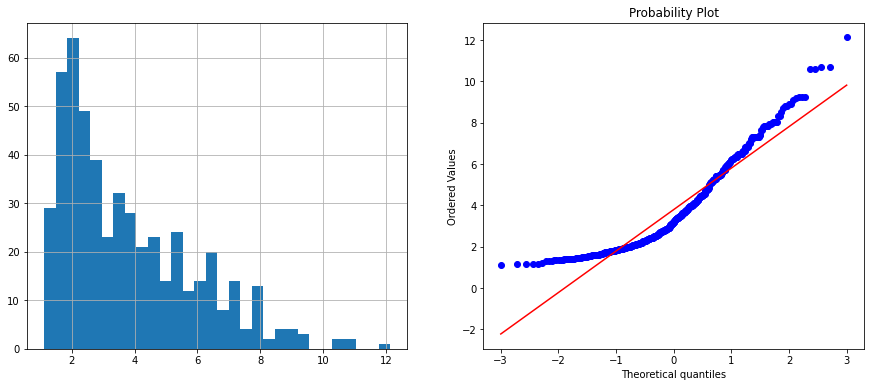

In [139]:
diagnostic_plots(Boston, 'DIS')

Let's check the distribution of the DIS variable after the transformation with the diagnostic function we created earlier. The transformed DIS distribution can be seen in the plots that are returned by the following code block:

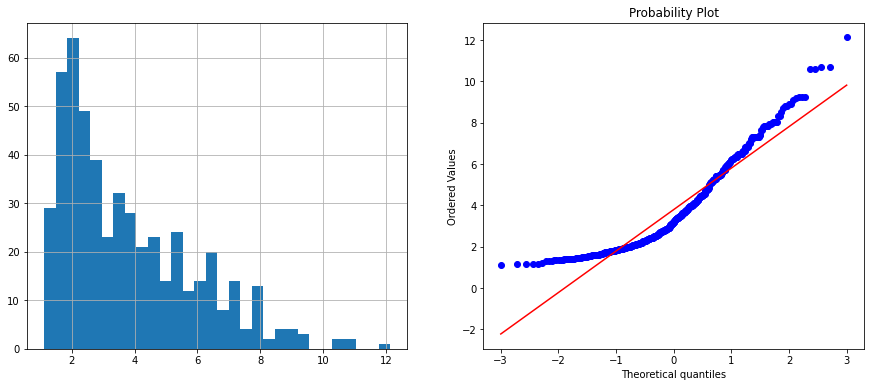

In [140]:
diagnostic_plots(Boston_tf, 'DIS')

Now, let's apply the Box-Cox transformation using scikit-learn. Let's start PowerTransformer() by specifying Box-Cox as an argument:

In [ ]:
transformer = PowerTransformer(method = 'box-cox', standardize = False)

Let's create a list with the variables we want to transform and then fit the 
transformer to the slice of the dataset that contains these variables:

In [142]:
cols = ['LSTAT', 'NOX', 'DIS', 'RM']
transformer.fit(Boston[cols])

FunctionTransformer(func=<function <lambda> at 0x0000026751430D30>)

Remember that the parameters need to be learned from the train set and
used to transform the train and test sets. Due to this, you should divide
your data into train and test sets before fitting PowerTransformer(). Now, let's transform the dataset:

In [146]:
Boston_tf = transformer.transform(Boston[cols])

Scikit-learn returns a NumPy array with the transformed variables, which we can
convert into a pandas dataframe by executing Boston_tf = pd.DataFrame(Boston_tf, columns = cols). Scikit-learn's PowerTransformer() stores the learned lambdas in its
lambdas_ attribute, which you can display by executing
transformer.lambdas_. Now, let's implement the Box-Cox transformation with Feature-engine. Let's start BoxCoxTransformer() by specifying the variables to transform in a
list and then fit it to the dataset:

In [148]:
bct = vt.BoxCoxTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])
bct.fit(Boston)

BoxCoxTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

Now, we'll transform the indicated variables in our data:

In [149]:
Boston_tf = bct.transform(Boston)

Note that, compared to PowerTransformer() from scikit-learn,
BoxCoxTransformer() from Feature-engine can take the entire
dataframe as input, but it will only transform the variables that are
specified when we start the transformer.
Feature-engine's transformer returns a dataframe with the original variables
where those indicated in an earlier step were transformed by Box-Cox. The optimal lambdas for each variable are stored in the lambda_dict_ attribute.
Let's inspect them:

In [150]:
bct.lambda_dict_

{'LSTAT': 0.22776736893884023,
 'NOX': -0.9156120907279849,
 'DIS': -0.15560583167193484,
 'RM': 0.4489597919730037}

# Performing Yeo-Johnson transformation on numerical variables

In [151]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import PowerTransformer
from feature_engine import transformation as vt

In [152]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [157]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Now, let's apply the Yeo-Johnson transformation using SciPy. First, let's make a copy of the original dataframe with pandas copy() so that we
can modify the values in the copy and not in the original dataframe:

In [153]:
Boston_tf = Boston.copy()

Let's apply the Yeo-Johnson transformation using SciPy to the LSTAT variable:

In [ ]:
Boston_tf['LSTAT'], param = stats.yeojohnson(Boston['LSTAT'])

scipy.stats.yeojohnson() can only be applied to one-dimensional
data and returns two parameters: the transformed variable and the
optimal lambda for the transformation, which we capture in the
param variable. Let's inspect the optimal lambda for the transformation:

In [154]:
print('Optimal λ: ', param)

Optimal λ:  0.22776736893884023


We can check the effect of the variable transformation with the diagnostic
function that we described in an earlier step of the Transforming variables with the
logarithm code. Now, let's apply the Yeo-Johnson transformation with scikit-learn.
Let's initialize PowerTransformer() by passing the yeo-johnson string in the
method:

In [155]:
transformer = PowerTransformer(method = 'yeo-johnson')

Let's create a list with the variables we want to transform and then fit the
transformer to the slice of the dataset that contains these variables:


In [156]:
cols = ['LSTAT', 'NOX', 'DIS', 'RM']
transformer.fit(Boston[cols])

PowerTransformer()

Remember that the parameters for the Yeo-Johnson transformation should
only be learned using the train set, so you must divide your dataset into
train and test sets before fitting the transformer.

In [162]:
# define x and y
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
X = Boston[feature_cols]
X = pd.DataFrame(X)
# split X and Y into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, X['LSTAT'], test_size = 0.25, shuffle = True, random_state = 66)

In [163]:
Boston_tf = transformer.transform(X_train[cols])

PowerTransformer() stores the learned parameters in its attribute
lambda, which you can return by executing transformer.lambda_.
Finally, let's implement the Yeo-Johnson transformation with Feature-engine. We'll initialize YeoJohnsonTransformer() by specifying which variables to
transform and then fit it to the dataset:

In [165]:
yjt = vt.YeoJohnsonTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'])
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['LSTAT', 'NOX', 'DIS', 'RM'])

If the variables argument is left as None, the transformer selects and
transforms all the numerical variables in the dataset.
Note that, compared to PowerTransformer() from scikit-learn, the
Feature-engine's transformer can take the entire dataframe as an argument
of the fit() method. Let's transform the specified variables in our data:

In [166]:
Boston_tf = yjt.transform(X_train)

YeoJohnsonTrasnformer() stores the best parameters per variable in its
lambda_dict_ attribute, which we can print as follows:

In [167]:
yjt.lambda_dict_

{'LSTAT': 0.15588216732965446,
 'NOX': -3.7008326043751323,
 'DIS': -0.5153921342265241,
 'RM': 0.6999368914405468}